In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
target_w=[2,1,3]

In [2]:
def data_gen(w):
    x=np.random.uniform(0,1,1000)
    x_2=x**2
    b=np.ones(1000)
    x_train=np.vstack([x_2,x,b])
    return np.dot(w,x_train), np.array([x_2,x])

In [3]:
y_train, x_data=data_gen(target_w)

In [4]:
x_data=x_data.T

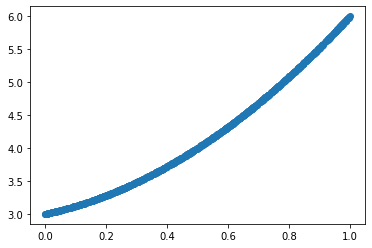

In [5]:
plt.scatter(x_data[:,1],y_train)

In [6]:
x_train=x_data

In [7]:
x_train=torch.FloatTensor(x_train)
y_train=torch.FloatTensor(y_train)

In [8]:
model=nn.Linear(2,1)

In [9]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [10]:
import time
nb_epochs = 5000
start = time.time()
for epoch in range(nb_epochs+1):

    prediction = torch.squeeze(model(x_train))
    cost = F.mse_loss(prediction, y_train) 
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 100 == 0:
      print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, nb_epochs, cost.item()
      ))
print("time:{:.6f} s".format(time.time()-start))

Epoch    0/5000 Cost: 23.468548
Epoch  100/5000 Cost: 0.002835
Epoch  200/5000 Cost: 0.002105
Epoch  300/5000 Cost: 0.001896
Epoch  400/5000 Cost: 0.001710
Epoch  500/5000 Cost: 0.001543
Epoch  600/5000 Cost: 0.001392
Epoch  700/5000 Cost: 0.001256
Epoch  800/5000 Cost: 0.001133
Epoch  900/5000 Cost: 0.001023
Epoch 1000/5000 Cost: 0.000923
Epoch 1100/5000 Cost: 0.000832
Epoch 1200/5000 Cost: 0.000751
Epoch 1300/5000 Cost: 0.000678
Epoch 1400/5000 Cost: 0.000611
Epoch 1500/5000 Cost: 0.000552
Epoch 1600/5000 Cost: 0.000498
Epoch 1700/5000 Cost: 0.000449
Epoch 1800/5000 Cost: 0.000405
Epoch 1900/5000 Cost: 0.000365
Epoch 2000/5000 Cost: 0.000330
Epoch 2100/5000 Cost: 0.000298
Epoch 2200/5000 Cost: 0.000268
Epoch 2300/5000 Cost: 0.000242
Epoch 2400/5000 Cost: 0.000218
Epoch 2500/5000 Cost: 0.000197
Epoch 2600/5000 Cost: 0.000178
Epoch 2700/5000 Cost: 0.000160
Epoch 2800/5000 Cost: 0.000145
Epoch 2900/5000 Cost: 0.000131
Epoch 3000/5000 Cost: 0.000118
Epoch 3100/5000 Cost: 0.000106
Epoch 3

In [11]:
print(list(model.parameters()))

[Parameter containing:
tensor([[1.9472, 1.0545]], requires_grad=True), Parameter containing:
tensor([2.9902], requires_grad=True)]


In [12]:
list(model.parameters())[0]

Parameter containing:
tensor([[1.9472, 1.0545]], requires_grad=True)

In [13]:
list(model.parameters())[1]

Parameter containing:
tensor([2.9902], requires_grad=True)

In [ ]:
# 결과가 정상적으로 2, 1, 3에 수렴함을 확인할 수 있다.